# **Chapter 3. Python 을 활용한 데이터 전처리** 





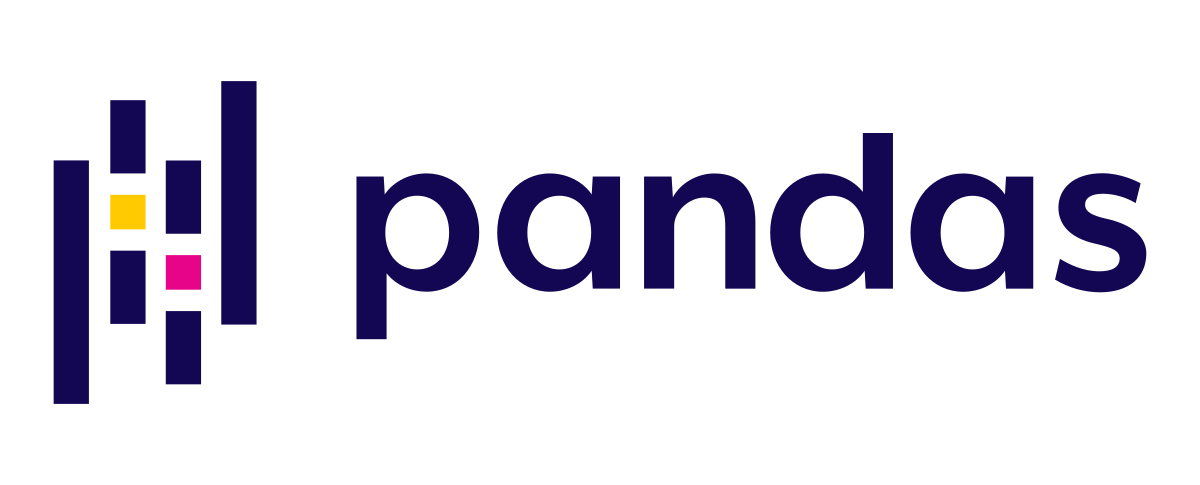


---
### **학습 목표**
> 3-4. Pandas 란? <br>
> **3-5. csv, excel 파일 읽고 쓰기, 요약 정보 한눈에 확인하기** <br>
> 3-6. 데이터 슬라이싱을 통해 Pandas 익숙해지기 <br>
> 3-7. 통계값 계산 및 정렬 방법 익히기 <br>
> 3-8. 피벗 테이블(pivot table) 기능과 그룹 통계(groupby) <br>
> 3-9. 데이터 합치기 (Join 과 Merge) <br>
> 3-10. 자료형 변환, 산술 연산 <br>
> 3-11. 전처리의 기본! 결측값, 중복 처리 <br>
> 3-12. 고급 기능 (apply, lambda, map) 으로 나도 이제 Pandas 고수! <br>
> 3-13. Pandas 시각화로 멋지게 레포팅하자 <br>
> 3-14. 실습 예제 <br>

## 3-5. csv, excel 파일 읽기, 요약 정보 한눈에 확인하기

In [2]:
# 라이브러리 임포트
import pandas as pd

> ###  **3-5-1. 데이터 프레임 직접 만들기**
> - Pandas 는 **리스트(list)** 또는 **딕셔너리(dict)** 를 활용해서 **데이터 프레임 (`DataFrame`)** 을 직접 만들 수 있습니다
> - Pandas 데이터 프레임 (`DataFrame`) 은 **여러개의 (`Series`)** 로 이루어진 것 입니다
> <br>
>


> **리스트(list) 로 만들기**

In [3]:
mylist = [1,2,3,4]
mySeries = pd.Series(mylist)
print(mylist)
print(mySeries)

[1, 2, 3, 4]
0    1
1    2
2    3
3    4
dtype: int64


In [4]:
type(mySeries)

pandas.core.series.Series

In [5]:
mylists = [['야구', '류현진', '22,300,000,000'],
           ['축구', '손흥민', '15,000,000,000'],
           ['롤', '페이커', '5,200,000,000']]
df = pd.DataFrame(mylists)
df

0    1               2
0  야구  류현진  22,300,000,000
1  축구  손흥민  15,000,000,000
2   롤  페이커   5,200,000,000

In [6]:
# 컬럼명 지정
df = pd.DataFrame(mylists, columns=['종목', '이름', '연봉'])
df

종목   이름              연봉
0  야구  류현진  22,300,000,000
1  축구  손흥민  15,000,000,000
2   롤  페이커   5,200,000,000

> **딕셔너리(dict) 로 만들기**

In [7]:
mydict = {'종목': ['야구', '축구', '롤'],
          '이름': ['류현진', '손흥민', '페이커'],
          '연봉': ['22,300,000,000', '15,000,000,000', '5,200,000,000']}
df = pd.DataFrame(mydict)
df

종목   이름              연봉
0  야구  류현진  22,300,000,000
1  축구  손흥민  15,000,000,000
2   롤  페이커   5,200,000,000

> ### **3-5-2. csv 파일 읽고 쓰기**
> - `read_csv(파일 경로)` 명령어로 csv 파일을 읽어올 수 있습니다 <br>
> - `to_csv(파일 경로)` 명령어로 csv 파일을 저장할 수 있습니다 <br>
> - 실습 데이터 다운로드 : [kpop_idols.csv](https://docs.google.com/uc?export=download&id=1-2OsTtqS7Ci3uadVHFsPNbJZBNpevloi)
> <br>
>


In [8]:
# 드라이브 마운트(colab 사용할 경우 실행)
# from google.colab import drive
# drive.mount('/content/drive')

In [9]:
# csv 파일이 저장'된' 경로
csv_path = 'kpop_idols.csv'

In [10]:
# 파일 읽기
df = pd.read_csv(csv_path)
df

Profile Stage Name        Full Name Korean Name K. Stage Name  \
0     Profile    Taeyeon      Kim Taeyeon         김태연            태연   
1         NaN      Sunny       Lee Sunkyu         이순규            써니   
2         NaN    Tiffany    Hwang Miyoung         황미영           티파니   
3         NaN    Hyoyeon      Kim Hyoyeon         김효연            효연   
4         NaN       Yuri        Kwon Yuri         권유리            유리   
...       ...        ...              ...         ...           ...   
1589      NaN     Ririka   Kishida Ririka     키시다 리리카           리리카   
1590      NaN       Nayu        Kim Yewon         김예원            나유   
1591      NaN       Elva      Lee Yonghwa         이용화            엘바   
1592      NaN       Lily  Lily Jin Morrow    릴리 진 머로우            릴리   
1593      NaN     Haewon        Oh Haewon         오해원            해원   

     Date of Birth  Group      Country Second Country  Height  Weight  \
0       1989-03-09   SNSD  South Korea            NaN     160      44   
1       1989-05-15   SNSD  South Korea            NaN     158      43   
2       1989-08-01   SNSD  South Korea            USA     163      50   
3       1989-09-22   SNSD  South Korea            NaN     158      48   
4       1989-12-05   SNSD  South Korea            NaN     167      45   
...            ...    ...          ...            ...     ...     ...   
1589    2002-07-02  ILY:1        Japan            NaN     162       0   
1590    2002-07-23  ILY:1  South Korea            NaN       0       0   
1591    2003-05-05  ILY:1  South Korea            NaN       0       0   
1592    2002-10-17  NMIXX    Australia    South Korea       0       0   
1593    2003-02-25  NMIXX  South Korea            NaN       0       0   

         Birthplace Other Group Former Group Gender               Position  \
0            Jeonju  TTS, Oh!GG          NaN      F  Leader, Main Vocalist   
1        California         NaN          NaN      F                    NaN   
2     San Francisco         TTS          NaN      F                    NaN   
3           Incheon         NaN          NaN      F                    NaN   
4            Goyang         NaN          NaN      F                    NaN   
...             ...         ...          ...    ...                    ...   
1589            NaN         NaN          NaN      F                    NaN   
1590            NaN         NaN          NaN      F                    NaN   
1591            NaN         NaN          NaN      F                    NaN   
1592     Marysville         NaN          NaN      F                    NaN   
1593            NaN         NaN          NaN      F                    NaN   

         Instagram Twitter  
0       taeyeon_ss     NaN  
1       svnnynight     NaN  
2     xolovestephi     NaN  
3      watasiwahyo     NaN  
4          yulyulk     NaN  
...            ...     ...  
1589           NaN     NaN  
1590           NaN     NaN  
1591           NaN     NaN  
1592           NaN     NaN  
1593           NaN     NaN  

[1594 rows x 18 columns]

In [11]:
df.head()  # 5개 데이터만 보여줌

Profile Stage Name      Full Name Korean Name K. Stage Name Date of Birth  \
0  Profile    Taeyeon    Kim Taeyeon         김태연            태연    1989-03-09   
1      NaN      Sunny     Lee Sunkyu         이순규            써니    1989-05-15   
2      NaN    Tiffany  Hwang Miyoung         황미영           티파니    1989-08-01   
3      NaN    Hyoyeon    Kim Hyoyeon         김효연            효연    1989-09-22   
4      NaN       Yuri      Kwon Yuri         권유리            유리    1989-12-05   

  Group      Country Second Country  Height  Weight     Birthplace  \
0  SNSD  South Korea            NaN     160      44         Jeonju   
1  SNSD  South Korea            NaN     158      43     California   
2  SNSD  South Korea            USA     163      50  San Francisco   
3  SNSD  South Korea            NaN     158      48        Incheon   
4  SNSD  South Korea            NaN     167      45         Goyang   

  Other Group Former Group Gender               Position     Instagram Twitter  
0  TTS, Oh!GG          NaN      F  Leader, Main Vocalist    taeyeon_ss     NaN  
1         NaN          NaN      F                    NaN    svnnynight     NaN  
2         TTS          NaN      F                    NaN  xolovestephi     NaN  
3         NaN          NaN      F                    NaN   watasiwahyo     NaN  
4         NaN          NaN      F                    NaN       yulyulk     NaN

In [12]:
df.head(10)

Profile Stage Name      Full Name Korean Name K. Stage Name Date of Birth  \
0  Profile    Taeyeon    Kim Taeyeon         김태연            태연    1989-03-09   
1      NaN      Sunny     Lee Sunkyu         이순규            써니    1989-05-15   
2      NaN    Tiffany  Hwang Miyoung         황미영           티파니    1989-08-01   
3      NaN    Hyoyeon    Kim Hyoyeon         김효연            효연    1989-09-22   
4      NaN       Yuri      Kwon Yuri         권유리            유리    1989-12-05   
5      NaN   Sooyoung  Choi Sooyoung         최수영            수영    1990-02-10   
6      NaN      Yoona       Im Yoona         임윤아            윤아    1990-05-30   
7      NaN    Seohyun    Seo Joohyun         서주현            서현    1991-06-28   
8      NaN    Jessica   Jessica Jung       제시카 정           제시카    1989-04-18   
9      NaN         CL    Lee Chaerin         이채린            씨엘    1991-02-26   

  Group      Country Second Country  Height  Weight     Birthplace  \
0  SNSD  South Korea            NaN     160      44         Jeonju   
1  SNSD  South Korea            NaN     158      43     California   
2  SNSD  South Korea            USA     163      50  San Francisco   
3  SNSD  South Korea            NaN     158      48        Incheon   
4  SNSD  South Korea            NaN     167      45         Goyang   
5  SNSD  South Korea            NaN     170      48        Gwangju   
6  SNSD  South Korea            NaN     166      47          Seoul   
7  SNSD  South Korea            NaN     168      48          Seoul   
8   NaN  South Korea            NaN       0       0            NaN   
9  2NE1  South Korea            NaN       0       0            NaN   

  Other Group Former Group Gender               Position     Instagram Twitter  
0  TTS, Oh!GG          NaN      F  Leader, Main Vocalist    taeyeon_ss     NaN  
1         NaN          NaN      F                    NaN    svnnynight     NaN  
2         TTS          NaN      F                    NaN  xolovestephi     NaN  
3         NaN          NaN      F                    NaN   watasiwahyo     NaN  
4         NaN          NaN      F                    NaN       yulyulk     NaN  
5         NaN          NaN      F                    NaN    hotsootuff     NaN  
6         NaN          NaN      F                    NaN    yoona__lim     NaN  
7         TTS          NaN      F                    NaN   seojuhyun_s     NaN  
8         NaN         SNSD      F                    NaN   jessica.syj     NaN  
9         NaN          NaN      F                    NaN     chaelincl     NaN

In [13]:
df.tail()

Profile Stage Name        Full Name Korean Name K. Stage Name  \
1589     NaN     Ririka   Kishida Ririka     키시다 리리카           리리카   
1590     NaN       Nayu        Kim Yewon         김예원            나유   
1591     NaN       Elva      Lee Yonghwa         이용화            엘바   
1592     NaN       Lily  Lily Jin Morrow    릴리 진 머로우            릴리   
1593     NaN     Haewon        Oh Haewon         오해원            해원   

     Date of Birth  Group      Country Second Country  Height  Weight  \
1589    2002-07-02  ILY:1        Japan            NaN     162       0   
1590    2002-07-23  ILY:1  South Korea            NaN       0       0   
1591    2003-05-05  ILY:1  South Korea            NaN       0       0   
1592    2002-10-17  NMIXX    Australia    South Korea       0       0   
1593    2003-02-25  NMIXX  South Korea            NaN       0       0   

      Birthplace Other Group Former Group Gender Position Instagram Twitter  
1589         NaN         NaN          NaN      F      NaN       NaN     NaN  
1590         NaN         NaN          NaN      F      NaN       NaN     NaN  
1591         NaN         NaN          NaN      F      NaN       NaN     NaN  
1592  Marysville         NaN          NaN      F      NaN       NaN     NaN  
1593         NaN         NaN          NaN      F      NaN       NaN     NaN

In [14]:
df.tail(10)

Profile Stage Name        Full Name Korean Name K. Stage Name  \
1584     NaN    Eunchan  Choi Byeongseop         최병섭            은찬   
1585     NaN     Taerae       Kim Taerae         김태래            태래   
1586     NaN       Hana      Hayase Hana      하야세 하나            하나   
1587     NaN        Ara        Lee Yunji         이윤지            아라   
1588     NaN       Rona      Chang Ching          장찡            로나   
1589     NaN     Ririka   Kishida Ririka     키시다 리리카           리리카   
1590     NaN       Nayu        Kim Yewon         김예원            나유   
1591     NaN       Elva      Lee Yonghwa         이용화            엘바   
1592     NaN       Lily  Lily Jin Morrow    릴리 진 머로우            릴리   
1593     NaN     Haewon        Oh Haewon         오해원            해원   

     Date of Birth    Group      Country Second Country  Height  Weight  \
1584    2001-02-27  TEMPEST  South Korea            NaN     184       0   
1585    2002-09-05  TEMPEST  South Korea            NaN       0       0   
1586    2000-02-27    ILY:1        Japan            NaN     165       0   
1587    2002-01-23    ILY:1  South Korea            NaN     158       0   
1588    2002-06-05    ILY:1       Taiwan            NaN     165       0   
1589    2002-07-02    ILY:1        Japan            NaN     162       0   
1590    2002-07-23    ILY:1  South Korea            NaN       0       0   
1591    2003-05-05    ILY:1  South Korea            NaN       0       0   
1592    2002-10-17    NMIXX    Australia    South Korea       0       0   
1593    2003-02-25    NMIXX  South Korea            NaN       0       0   

      Birthplace Other Group Former Group Gender Position Instagram Twitter  
1584         NaN         NaN          NaN      M      NaN       NaN     NaN  
1585         NaN         NaN          NaN      M      NaN       NaN     NaN  
1586         NaN         NaN          NaN      F      NaN       NaN     NaN  
1587         NaN         NaN          NaN      F      NaN       NaN     NaN  
1588      Taipei         NaN          NaN      F      NaN       NaN     NaN  
1589         NaN         NaN          NaN      F      NaN       NaN     NaN  
1590         NaN         NaN          NaN      F      NaN       NaN     NaN  
1591         NaN         NaN          NaN      F      NaN       NaN     NaN  
1592  Marysville         NaN          NaN      F      NaN       NaN     NaN  
1593         NaN         NaN          NaN      F      NaN       NaN     NaN

In [15]:
# csv 파일을 저장'할' 경로
csv_path = 'kpop_idols(1).csv'

In [16]:
# 파일 저장
df.to_csv(csv_path)

> ###  **3-5-3. excel 파일 읽고 쓰기**
> - `read_excel(파일 경로)` 명령어로 엑셀 파일을 읽어올 수 있습니다 <br>
> - `to_excel(파일 경로)` 명령어로 엑셀 파일을 저장할 수 있습니다 <br>
> - 실습 데이터 다운로드 : [kpop_idos.xlsx](https://docs.google.com/uc?export=download&id=1--GDD-zqv7v2Gm0-1j7D_IA14wAtke58)
> <br>


In [17]:
# 엑셀 파일이 저장'된' 경로
excel_path = 'kpop_idols.xlsx'

In [18]:
pip install openpyxl


   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   ---------------------------------------- 2/2 [openpyxl]

Note: you may need to restart the kernel to use updated packages.


In [19]:
# 파일 읽기
df = pd.read_excel(excel_path)

In [20]:
df.head()

Profile Stage Name      Full Name Korean Name K. Stage Name Date of Birth  \
0  Profile    Taeyeon    Kim Taeyeon         김태연            태연    1989-03-09   
1      NaN      Sunny     Lee Sunkyu         이순규            써니    1989-05-15   
2      NaN    Tiffany  Hwang Miyoung         황미영           티파니    1989-08-01   
3      NaN    Hyoyeon    Kim Hyoyeon         김효연            효연    1989-09-22   
4      NaN       Yuri      Kwon Yuri         권유리            유리    1989-12-05   

  Group      Country Second Country  Height  Weight     Birthplace  \
0  SNSD  South Korea            NaN     160      44         Jeonju   
1  SNSD  South Korea            NaN     158      43     California   
2  SNSD  South Korea            USA     163      50  San Francisco   
3  SNSD  South Korea            NaN     158      48        Incheon   
4  SNSD  South Korea            NaN     167      45         Goyang   

  Other Group Former Group Gender               Position     Instagram Twitter  
0  TTS, Oh!GG          NaN      F  Leader, Main Vocalist    taeyeon_ss     NaN  
1         NaN          NaN      F                    NaN    svnnynight     NaN  
2         TTS          NaN      F                    NaN  xolovestephi     NaN  
3         NaN          NaN      F                    NaN   watasiwahyo     NaN  
4         NaN          NaN      F                    NaN       yulyulk     NaN

In [21]:
# 엑셀 파일을 저장'할' 경로
excel_path = 'kpop_idols(1).xlsx'

In [22]:
# 파일 저장
df.to_excel(excel_path)

> ### **3-5-4. 크롤링(crawling) 테이블 읽기**
> - Pandas 는 **웹사이트에서 테이블**을 **데이터 프레임 형태**로 가져올 수 있는 크롤링 기능도 제공합니다!
> 
> <br>
>


In [30]:
!pip install -q requests
!pip install -q lxml

In [31]:
import requests
from io import StringIO

site = 'https://dbkpop.com/db/female-k-pop-idols/'
response = requests.get(site)

df = pd.read_html(StringIO(response.text))[0]
df.columns = df.columns.get_level_values(0)
print(df.columns)

Index(['Profile', 'Stage Name', 'Full Name', 'Korean Name',
       'Korean Stage Name', 'Date of Birth', 'Group', 'Country',
       'Second Country', 'Height', 'Weight', 'Birthplace', 'Other Group',
       'Former Group', 'Position', 'Instagram', 'Twitter'],
      dtype='object')


In [32]:
df.head()

Profile Stage Name      Full Name Korean Name Korean Stage Name  \
0  Profile    Taeyeon    Kim Taeyeon         김태연                태연   
1      NaN      Sunny     Lee Sunkyu         이순규                써니   
2      NaN    Tiffany  Hwang Miyoung         황미영               티파니   
3      NaN    Hyoyeon    Kim Hyoyeon         김효연                효연   
4      NaN       Yuri      Kwon Yuri         권유리                유리   

  Date of Birth Group      Country Second Country  Height  Weight  \
0    1989-03-09  SNSD  South Korea            NaN     160      44   
1    1989-05-15  SNSD  South Korea            NaN     158      43   
2    1989-08-01  SNSD  South Korea            USA     163      50   
3    1989-09-22  SNSD  South Korea            NaN     158      48   
4    1989-12-05  SNSD  South Korea            NaN     167      45   

      Birthplace Other Group Former Group               Position  \
0         Jeonju  TTS, Oh!GG          NaN  Leader, Main Vocalist   
1     California         NaN          NaN                    NaN   
2  San Francisco         TTS          NaN                    NaN   
3        Incheon         NaN          NaN                    NaN   
4         Goyang         NaN          NaN                    NaN   

      Instagram Twitter  
0    taeyeon_ss     NaN  
1    svnnynight     NaN  
2  xolovestephi     NaN  
3   watasiwahyo     NaN  
4       yulyulk     NaN

> ### **3-5-5. 요약 정보 확인하기**
> - `info()` 명령어로 한눈에 데이터 프레임의 **전체 행 (row) 수**, **컬럼 (column) 정보**, **Null (빈값)**, **DataType (데이터 타입)** 정보를 확인할 수 있습니다.
> <br>
>


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1594 entries, 0 to 1593
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Profile         412 non-null    object
 1   Stage Name      1594 non-null   object
 2   Full Name       1587 non-null   object
 3   Korean Name     1586 non-null   object
 4   K. Stage Name   1593 non-null   object
 5   Date of Birth   1593 non-null   object
 6   Group           1465 non-null   object
 7   Country         1594 non-null   object
 8   Second Country  54 non-null     object
 9   Height          1594 non-null   int64 
 10  Weight          1594 non-null   int64 
 11  Birthplace      737 non-null    object
 12  Other Group     136 non-null    object
 13  Former Group    231 non-null    object
 14  Gender          1594 non-null   object
 15  Position        77 non-null     object
 16  Instagram       156 non-null    object
 17  Twitter         12 non-null     object
dtypes: int64